In [15]:
NAME = "Alexander Lein-McDonough"
CONTRIBUTORS = ""

# **Final Project: Movie Review Sentiment Prediction**

The follwoing imports the packages and datasets needed to perfrom the algorithm

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
#from sklearn.svm import SVC
from 

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
esw = ENGLISH_STOP_WORDS

reviewData = pd.read_csv(r'clean_data.csv').set_index('Unnamed: 0')
print(reviewData.head(5))

                                                SentimentText  Sentiment
Unnamed: 0                                                              
0           first think another disney movie might good it...          1
1           put aside dr house repeat missed desperate hou...          0
2           big fan stephen king s work film made even gre...          1
3           watched horrid thing tv needless say one movie...          0
4           truly enjoyed film acting terrific plot jeff c...          1


The following defines functions needed to feature engineer our data and to plot our confusion matrix

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
def Series2VectDF(series_data):
    vec = CountVectorizer(ngram_range=(1,1))
    X = vec.fit_transform(series_data)
    return X, vec

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels((y_true)), (y_pred)))]
    #ME: disable above functionality for the PA
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Here, we define how many features from our main dataset we use in our calculations with "sentiment" as the text for each review and "y" being our vector for whether the review was positive (1) or negative (0)

In [25]:
n = 6000
sentiment = reviewData['SentimentText'][0:n]
y = reviewData['Sentiment'][0:n]
print(sentiment.head(5))
print(y.head(5))

Unnamed: 0
0    first think another disney movie might good it...
1    put aside dr house repeat missed desperate hou...
2    big fan stephen king s work film made even gre...
3    watched horrid thing tv needless say one movie...
4    truly enjoyed film acting terrific plot jeff c...
Name: SentimentText, dtype: object
Unnamed: 0
0    1
1    0
2    1
3    0
4    1
Name: Sentiment, dtype: int64


We convert our data for each comment into an array which shows which words are in each comment (1 if it's in the comment, 0 if it's not) via the columns with a Count Vectorizer, and then removes the words that appear on a list of common english words

In [20]:
Xd, vecd = Series2VectDF(sentiment)
Xrd = pd.DataFrame(Xd.toarray(), columns=vecd.get_feature_names())
Xrd.drop(Xrd.columns[Xrd.columns.isin(esw)], axis = 1, inplace = True)
print(Xrd.head(5))

   aa  aaa  aaaaah  aaah  aaargh  aadha  aag  aage  aaker  aames ...  zucco  \
0   0    0       0     0       0      0    0     0      0      0 ...      0   
1   0    0       0     0       0      0    0     0      0      0 ...      0   
2   0    0       0     0       0      0    0     0      0      0 ...      0   
3   0    0       0     0       0      0    0     0      0      0 ...      0   
4   0    0       0     0       0      0    0     0      0      0 ...      0   

   zucker  zuckerman  zuf  zukhov  zulu  zumhofe  zuniga  zwick  zy  
0       0          0    0       0     0        0       0      0   0  
1       0          0    0       0     0        0       0      0   0  
2       0          0    0       0     0        0       0      0   0  
3       0          0    0       0     0        0       0      0   0  
4       0          0    0       0     0        0       0      0   0  

[5 rows x 41014 columns]


We split our count vectorized matrix and our sentement vector and our into training and test data, define an Multinomial Naive Bayes model, and fit the model to our training data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xrd, y, random_state=0, test_size=0.2)
model = MultinomialNB()#SVC(kernel = 'linear')
#param_grid = {'kernel': ('linear','poly', 'rbf', 'sigmoid'), 'degree': [1, 3, 5], 'shrinking': [True, False], 'C':[1, 7]}
grid = model#GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)
#print(grid.best_params_)
#y_model_test = grid.predict(X_test)
#accuracy_score(y_test, y_model_test)

0.8291666666666667

We run our model on our training and test datasets to see how well the model performs (with accuracy) with "Train Accuracy" being the accuracy of our model on our training data and "Test Accuracy" is the accurracy of our model on our test data.  We also polit confusion matricies, one normalized and one not, to see how our model precdicted each item in the datasets.

Train accuracy is 95.96 %
Test accuracy is 82.92 %
Confusion matrix, without normalization
[[2305   56]
 [ 138 2301]]
Normalized confusion matrix
[[0.97628124 0.02371876]
 [0.05658057 0.94341943]]
Confusion matrix, without normalization
[[524 102]
 [103 471]]
Normalized confusion matrix
[[0.8370607  0.1629393 ]
 [0.17944251 0.82055749]]


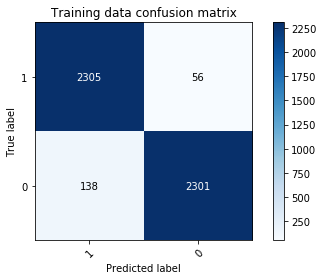

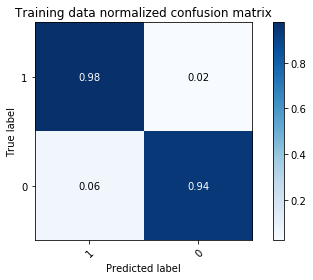

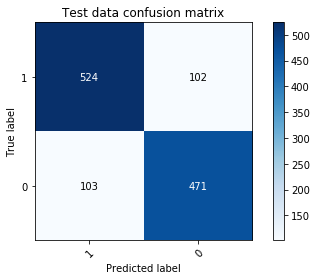

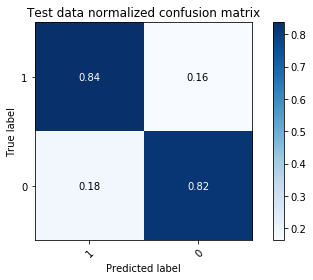

In [26]:
print("Train accuracy is %.2f %%" % (grid.score(X_train, y_train)*100))
print("Test accuracy is %.2f %%" % (grid.score(X_test, y_test)*100))
plot_confusion_matrix(y_train, grid.predict(X_train), y, title = "Training data confusion matrix")
plot_confusion_matrix(y_train, grid.predict(X_train), y, normalize = True, title = "Training data normalized confusion matrix")
plot_confusion_matrix(y_test, grid.predict(X_test), y, title = "Test data confusion matrix")
plot_confusion_matrix(y_test, grid.predict(X_test), y, normalize = True, title = "Test data normalized confusion matrix")

We perform a crossvalidation by chopping the dataset into fifths where each fifth is set to be our training data while the other four fifths become our training data.  We then calculate the accuracies for each run, and get the average and ~98.6% (2 standard deviations) confidence interval for the actuall mean accuracy of our model.

In [13]:
scores = cross_val_score(model, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84929226 0.84263114 0.81666667 0.82902419 0.85154295]
Accuracy: 0.84 (+/- 0.03)
